## Lab 5 Report

Hsuan-Chung Hung, Scott Lin, Charles Tung Fang

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal
import csv

## Summary

This lab a series of exercises to transform signals from the time domain to the frequency domain and try to identify the frequencies of ejωt that comprise a periodic signal. There are 3 assignments done in this lab: Identifying Component Frequencies of a Signal, Classifying Touch-Tone Telephone Signals, Decoding a Phone Number from Touch-Tone Signals.

## Assignment 1 --  Identifying Component Frequencies of a Signal

<IPython.core.display.Javascript object>


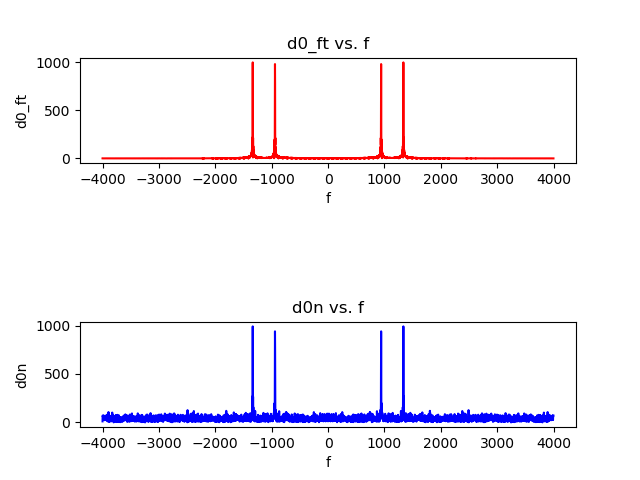

941.40625
1335.9375


In [2]:
#Part A

fs = 8000
t = np.arange(0, 0.25, 1/fs)
d0t = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)

#Part B
pause = np.zeros(int(0.5 * fs), dtype = np.int16)
d = np.concatenate([d0t, pause, d0t])
d = 2000 * d

outfile = 'd.wav'
wav.write(outfile,fs,d.astype('int16'))
wav_obj1 = sa.WaveObject.from_wave_file('d.wav')
play_obj1 = wav_obj1.play()
play_obj1.wait_done()

#Part C
d0_ft = np.fft.fft(d0t, 4096)
d0_ft = np.fft.fftshift(d0_ft)
d0_ft = np.abs(d0_ft)
f = np.arange(-fs/2, fs/2, fs/4096)


fig = plt.figure(1)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(2, 1, 1)
plt.plot(f, d0_ft, color = 'r')
plt.ylabel('d0_ft')
plt.xlabel('f')
plt.title('d0_ft vs. f')

#Part D
ind = np.arange(len(d0_ft))
a = ind[d0_ft[ind] > 900]
for i in range (0, len(a)):
    f0 = f[a[i]]
    if f0 > 0:
        print(f0)
        
#Part E
n = np.random.normal(0,1,len(d0t))
d0n = n + d0t
d0n = np.fft.fft(d0n, 4096)
d0n = np.fft.fftshift(d0n)
d0n = np.abs(d0n)

plt.subplot(2, 1, 2)
plt.plot(f, d0n, color = 'b')
plt.ylabel('d0n')
plt.xlabel('f')
plt.title('d0n vs. f')
plt.show()

###  Discussion

Because we are using discrete signal to simulate continuous signal, there will be multiple points having magnitude greater than 100. Espacially, when we plot the signal with noise, we can see a lot of points have magnitude greater than 100. 
The FFT of vt will have a impluse at f = 0 and other than that will be the same.

In [3]:
# Assignment 2 -  Classifying Touch-Tone Telephone Signals
#Part A
def classify(x, fs):
    tone_freqs = [[941,1336],
                  [697,1209],
                  [697,1336],
                  [697,1477],
                  [770,1209],
                  [770,1336],
                  [770,1477],
                  [852,1209],
                  [852,1336],
                  [852,1477]]
    xfft_abs = np.fft.fft(x, 4096)
    xfft_abs = np.fft.fftshift(xfft_abs)
    xfft_abs = np.abs(xfft_abs)
    ind = np.arange(len(xfft_abs))
    index_tone = ind[xfft_abs[ind] > 900]
    f = np.arange(-fs/2, fs/2, fs/4096)
    freq_tone = np.zeros(len(index_tone))
    pos_freq = np.zeros(2)
    for i in range (0, len(index_tone)):
        freq_tone[i] = f[index_tone[i]]
        if freq_tone[i] > 0:
            pos_freq[i-2] = f[index_tone[i]]
    
    for j in range (0, 10):
        m_e = (tone_freqs[j][0] - pos_freq[0])**2 + (tone_freqs[j][1]- pos_freq[1])**2
        if j == 0:
            min_e = m_e
            min_e_tone = 0
        if m_e < min_e:
            min_e = m_e
            min_e_tone = j
    
    return min_e_tone

In [4]:
#Part B
fs = 8000
t = np.arange(0, 0.25, 1/fs)
d4 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1209*t)
d5 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1336*t)
d8 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1336*t)
d9 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1477*t)

tone4 = classify(d4, fs)
tone5 = classify(d5, fs)
tone8 = classify(d8, fs)
tone9 = classify(d9, fs)

print(tone4, tone5, tone8, tone9)

4 5 8 9


###  Discussion

we can ensure high detection accuracy by classify it mutiple times and use the most common result and we may also multily the magintude of the input signal with a very large number and then increase the threshold.

In [5]:
# Assignment 3 -  Decoding a Phone Number from Touch-Tone Signals
#Part A
file = open('phonenum.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')

#Part B
phone_num = -np.ones(11)

#Part C
fs = 8000
for i in range(0, 11):
    start_index = i * 0.25 * fs * 2
    end_index = start_index + i * 0.25 * fs
    x = rm[int(start_index) : int(end_index)]
    phone_num[i] = classify(x, fs)
print(phone_num)

[1. 8. 0. 0. 7. 8. 6. 1. 0. 0. 0.]


###  Discussion

18007861000 In-N-Out Burger